## ДЗ 1. EDA по Hourly Energy Consumption и Brent

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

### 1. Выберите наборы данных, которые можно интерпретировать, как временные ряды:
<p>а) зависимость цены на недвижимость в конкретном регионе от времени,
<p>б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
<p>в) количество отказов компьютера,
<p>г) число обращений в поликлинику по району,
<p>д) координаты автобуса при движении по маршруту,
<p>е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

### Решение

**а) зависимость цены на недвижимость в конкретном регионе от времени**

*можно рассматривать как временной ряд, т.к. есть зависимость величины от предыдущего значения и возможна сезонная зависимость цены (т.е. зависимость от времени)*

**б) скорость полета самолета при перелете из аэропорта А в аэропорт В**

*можно рассматривать как временной ряд, т.к. есть зависимость величины от времени полета (разгон, взлет, набор высоты, линейное движение, посадка и тп) и от предыдущего значения*

**в) количество отказов компьютера**

*нет, это дискретная величина, не зависящая от значения в другой временной точке*

**г) число обращений в поликлинику по району**

*да*

**д) координаты автобуса при движении по маршруту**
*если подразумевается интервальная фиксация координат, то да, т.к. координаты зависят от значения в предыдущей временной точки и будет наблюдаться зависимость от времени, при соспоставлении графиков/значений для одних отрезков маршрута, пройденных в разные рейсы*

**е) координаты фигуры нарушителя в файле видеофиксации охранной системы**

*да, т.к. в файле будет фиксация значений (координат) с определенными временными интервалами, и значения зависят от предыдущих*

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Результат анализа типов показывает, что интервал изменения индексов начинается от 2005-12-31 01:00:00 и идет до 2018-01-02 00:00:00. Видно, что шаг измерений составляет 1 час. Общий объем данных составляет 119068 значений, а тип измеряемой информации  определен как float64.
Прорущенных значений нет.

Text(0, 0.5, 'МВт')

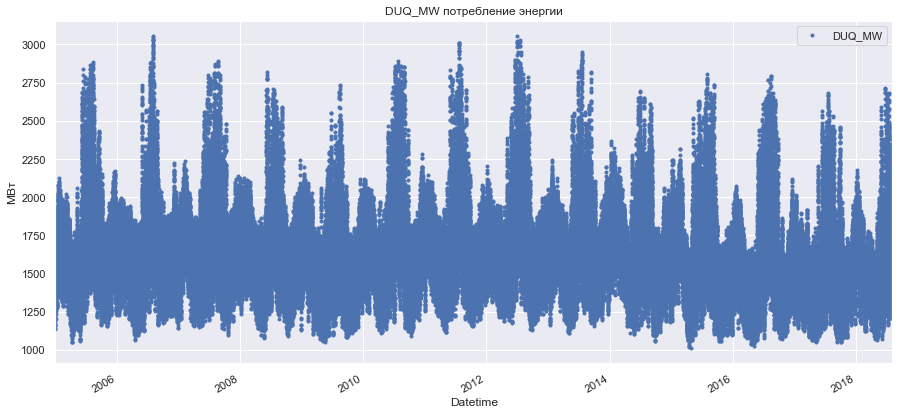

In [5]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Визуальный анализ показывает что:
- Рассматриваемые данные имеют цикличность
- Выбросов или аномалий не наблюдается

Посмотрим на графики в суточных разрезах

In [6]:
data['date'] = data.index
data_2012 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2012 , data['date'].dt.month == 10), data['date'].dt.day > 20  )]

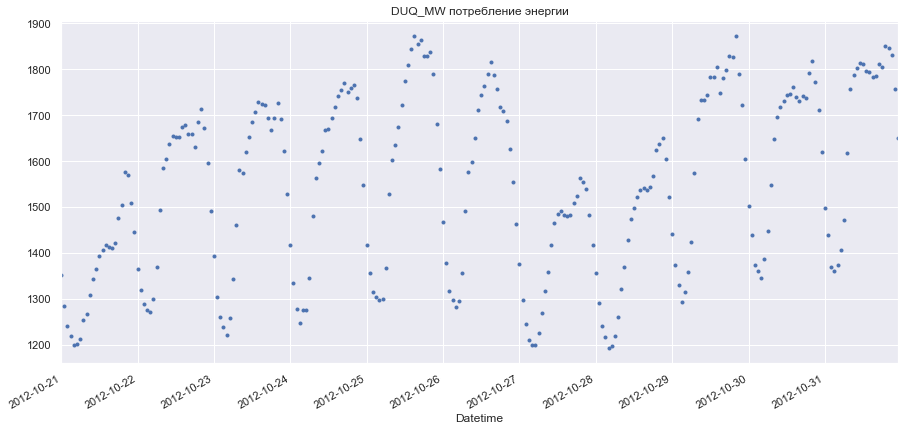

In [7]:
_ = data_2012['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW потребление энергии' )

Видно, что есть зависимость от времени суток.

In [8]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [9]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [10]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Видно, что 4 года подряд в начале ноября однажды вносили данные за день 2 раза. Это очевидно, не верно. В качестве предположения можно подумать о вариантах, например, переход на зимнее время и тогда, в марте -апреле должен быть пропуск. Проверим март-апрель 2015 года

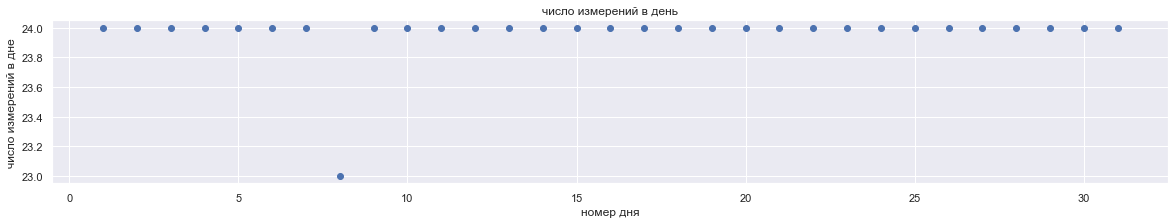

In [11]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Видим, что один из дней марта имеет меньше измерений, чем остальные. Определим номер этого дня используя подсчет числа измерений по дням и сравнение этой цифры с идеальным значением 24.

In [12]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [13]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

Видно, что после 2-го часа сразу наступил 4-й.

Гипотезу о переходе на летнее/зимнее время можно считать доказанной. Для дальнейшей работы с датафреймом, необходимо бует найти такие аномалии по всему ряду и преобразовать (заполнить) разрыв в индексах.

### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [14]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [15]:
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [16]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


Результат анализа типов показывает, что представлен интервал изменения индексов с 2010-09-01 и по 2019-09-01. Видно, что шаг измерений составляет 1 день. Общий объем данных составляет 2667 значений, а тип измеряемой информации  определен как float64.
Прорущенных значений нет.

Text(0.5, 0, 't')

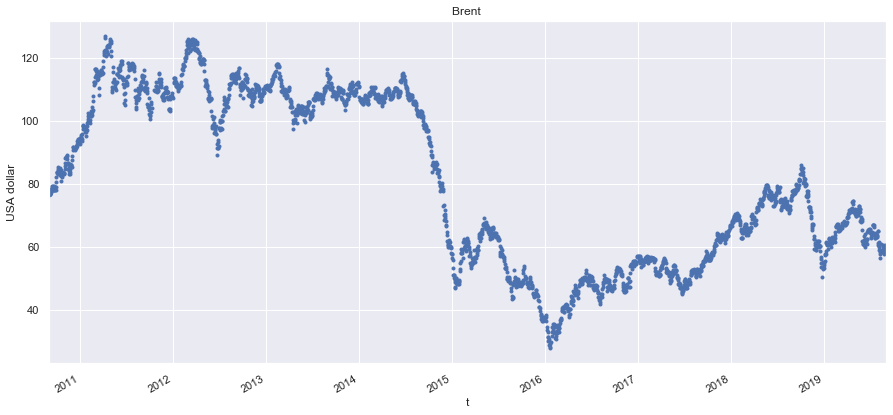

In [17]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [18]:
brent_M = brent_data.resample("M").mean() #по среднему за период
brent_M.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [19]:
brent_D = brent_data.resample("W").last() #по значению, на конец периода (недели)
brent_D.head()

,Значение
Дата,
2010-09-05,76.63
2010-09-12,78.36
2010-09-19,78.23
2010-09-26,78.94
2010-10-03,83.69


### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 1.0, 'Sigma (год)')

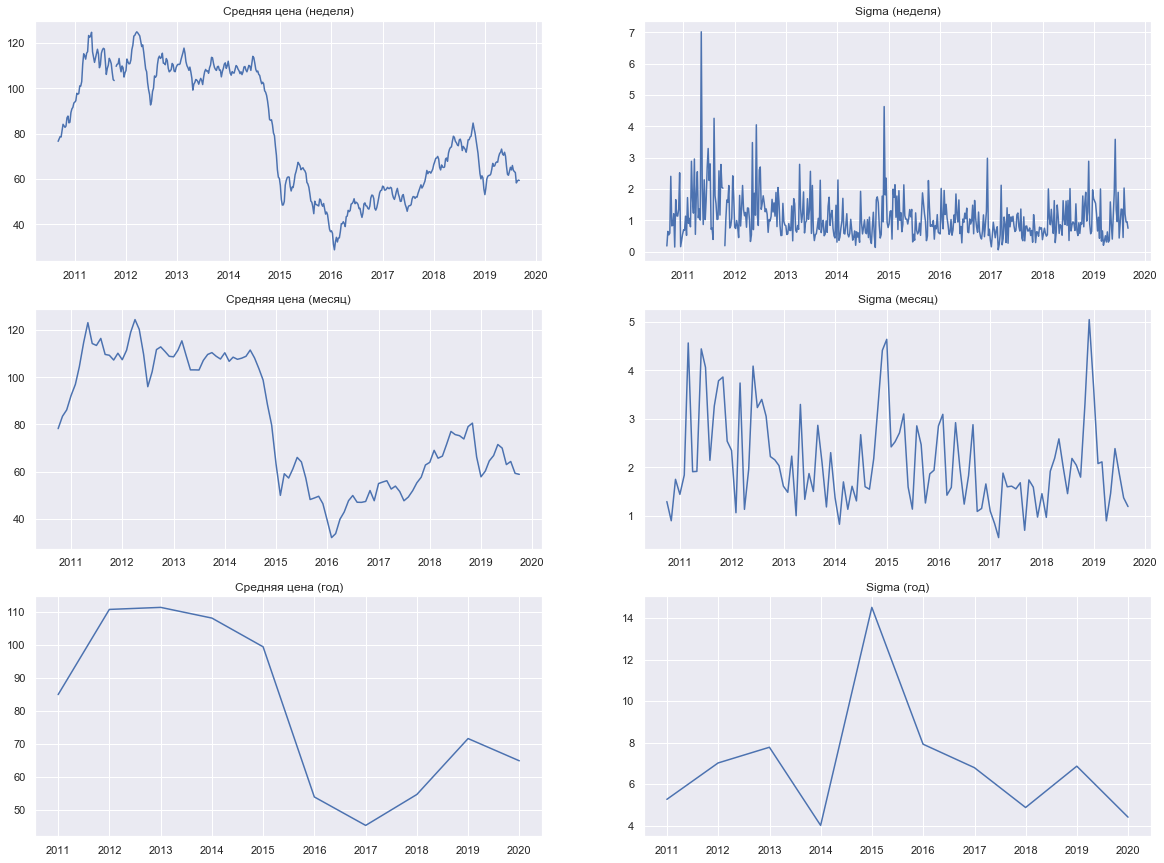

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.plot(brent_data.resample("W").mean().index, brent_data.resample("W").mean())
plt.title('Средняя цена (неделя)')

plt.subplot(3,2,2)
plt.plot(brent_data.resample("W").std().index, brent_data.resample("W").std())
plt.title('Sigma (неделя)')

plt.subplot(3,2,3)
plt.plot(brent_data.resample("M").mean().index, brent_data.resample("M").mean())
plt.title('Средняя цена (месяц)')

plt.subplot(3,2,4)
plt.plot(brent_data.resample("M").std().index, brent_data.resample("M").std())
plt.title('Sigma (месяц)')

plt.subplot(3,2,5)
plt.plot(brent_data.resample("Y").mean().index, brent_data.resample("Y").mean())
plt.title('Средняя цена (год)')

plt.subplot(3,2,6)
plt.plot(brent_data.resample("Y").std().index, brent_data.resample("Y").std())
plt.title('Sigma (год)')

### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

- Чем больше временной интервал, тем более гладкий график.
- Средние квадратичные отклонения на недельном графике имеют несколько более выраженных пиков, чем на месячном.
- Максимальный пик квадратичного отклонения находится на годовом графике (2015 г.)